## chap9. プロットと可視化  
2023-11-7 ~ 11-8  

Matpplotlib

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

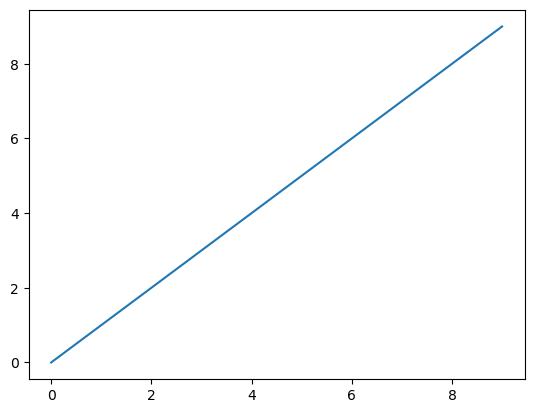

In [3]:
plt.plot(data)

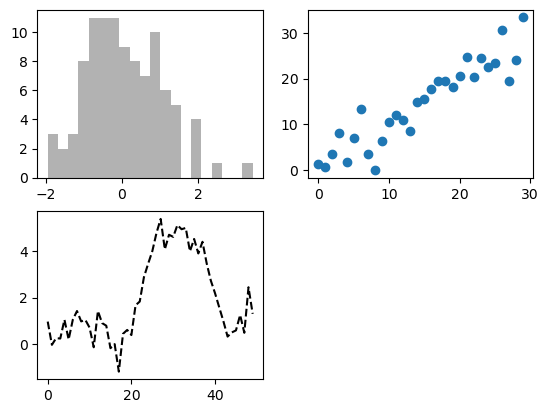

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color='black', linestyle='dashed')
ax1.hist(np.random.standard_normal(100), bins=20, color='black', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) +3 * np.random.standard_normal(30))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

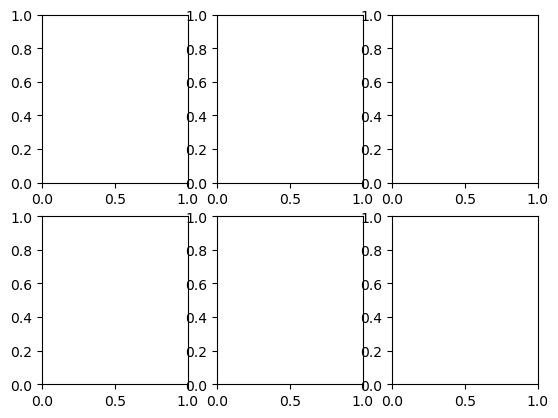

In [5]:
fig, axes = plt.subplots(2, 3)
axes

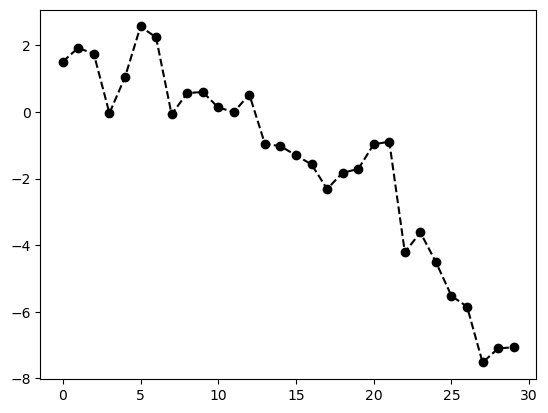

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color='black', linestyle='dashed', marker='o');

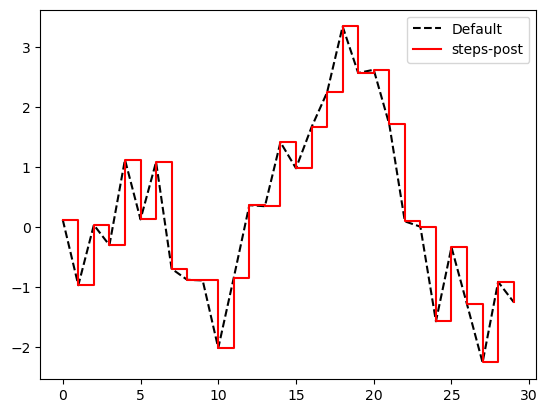

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color='black', linestyle='dashed', label='Default');
ax.plot(data, color='red', drawstyle='steps-post', label='steps-post');
ax.legend()

タイトル、軸のラベル、目盛り、目盛りのラベルを設定する

Text(0.5, 1.0, 'My first matplotlib plot')

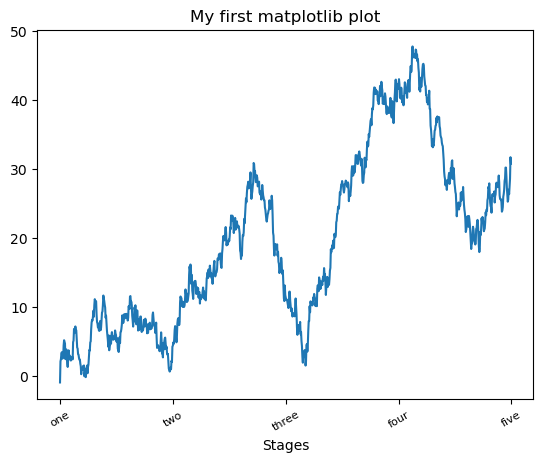

In [8]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize=8)
ax.set_xlabel('Stages')
ax.set_title('My first matplotlib plot')

凡例の追加

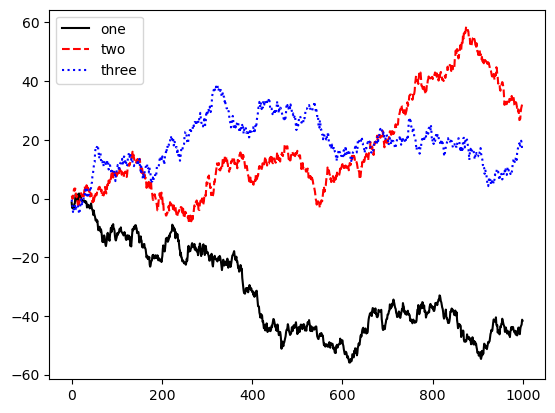

In [9]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color='black', label='one');
ax.plot(np.random.randn(1000).cumsum(), color='red', linestyle='dashed', label='two');
ax.plot(np.random.randn(1000).cumsum(), color='blue', linestyle='dotted', label='three');
ax.legend();

In [10]:
import matplotlib.font_manager as fm
fm.get_font_names();

In [11]:
from datetime import datetime
import matplotlib.dates as dates

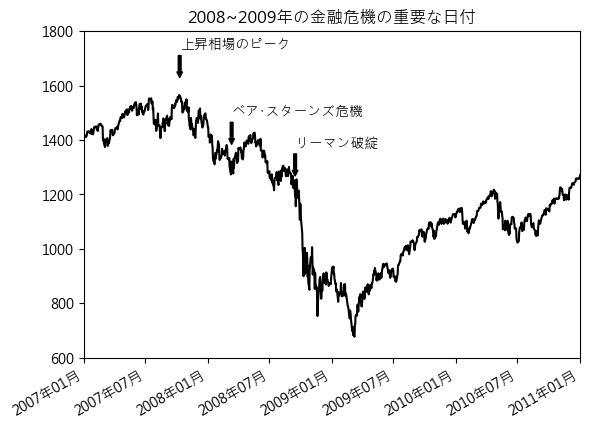

In [12]:
font_options = {'family': 'Microsoft JhengHei'}
plt.rc('font', **font_options)

fig, ax = plt.subplots()

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, color='black')

crisis_data = [
    (datetime(2007, 10, 11), '上昇相場のピーク'), 
    (datetime(2008, 3, 12), 'ベア･スターンズ危機'), 
    (datetime(2008, 9, 15), 'リーマン破綻')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225), 
                arrowprops = dict(facecolor='black', headwidth=4, width=2, headlength=4), 
                horizontalalignment='left', verticalalignment='top')

datefmt = dates.DateFormatter('%Y年%m月')
ax.xaxis.set_major_formatter(datefmt)

ax.set_xlabel(None)

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('2008~2009年の金融危機の重要な日付');

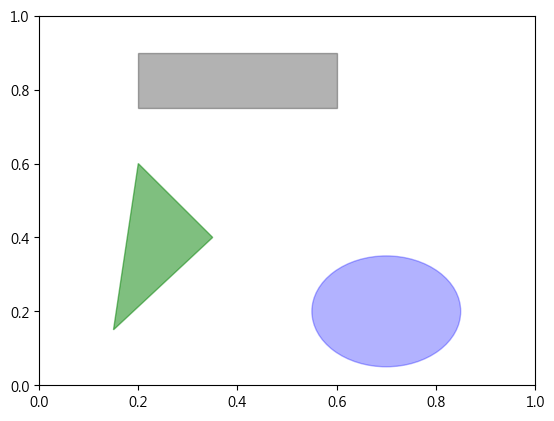

In [13]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='black', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='blue', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='green', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

プロットのファイルへの保存

In [14]:
fig.savefig('fig.pdf')
fig.savefig('fig.png', dpi=400)

Matplotlibの設定

plt.rc('figure', figsize=(10, 10))  
plt.rc('font', family='Microsoft JhengHei', weight='bold', size=8)

matplotlib/mpl-dataディレクトリにmatplotlibrcという設定ファイルがある  
ファイルの場所は、import matplotlib; matplotlib.matplotlib_fname()で確認できる

In [15]:
import matplotlib
matplotlib.matplotlib_fname()

'c:\\Users\\sinis\\anaconda3\\envs\\pydata-book\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

### 9.2 pandasやseabornを用いたプロット

折れ線グラフ

In [16]:
s = pd.Series(np.random.standard_normal(10).cumsum(),
              index=np.arange(0, 100, 10))
s

0    -0.387957
10    0.488592
20    0.224173
30    0.460376
40    0.738892
50    0.130735
60   -0.673197
70   -0.432918
80    0.521040
90    0.208144
dtype: float64

In [17]:
plt.rcdefaults()

<Axes: >

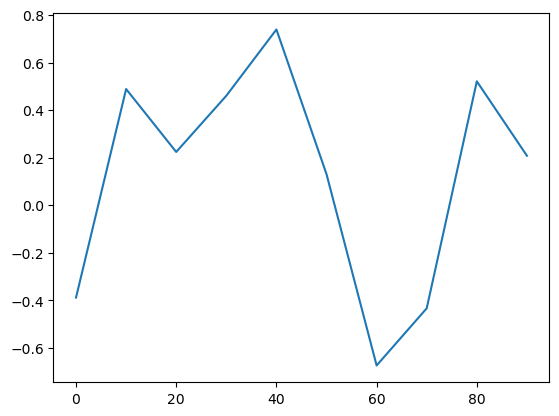

In [18]:
s.plot()

In [19]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'], 
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.007864,0.034871,0.324579,-1.734071
10,-0.695080,1.029709,-0.565337,-2.478787
20,0.686334,0.886701,-1.986704,-3.292931
30,1.824435,-0.501561,-2.523396,-4.335888
40,1.880063,-0.406520,-2.524950,-4.149385
50,2.216050,-1.830465,-2.070158,-4.702718
60,2.968438,-2.300050,-3.816903,-6.469062
70,4.836498,-2.914586,-3.887485,-7.498486
80,4.858447,-4.883949,-4.865341,-8.347576
90,4.409456,-4.796688,-5.828164,-8.691860


<Axes: >

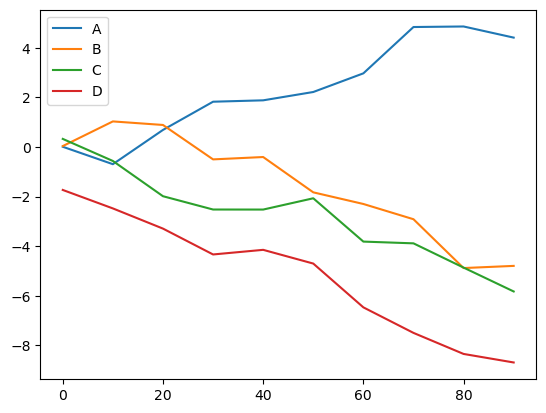

In [20]:
plt.style.use('default')
df.plot()

棒グラフ

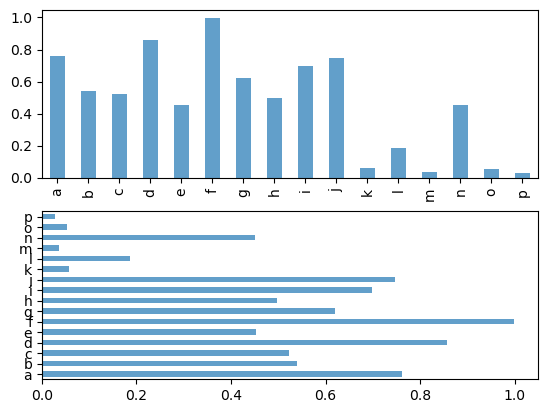

In [21]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), 
                 index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], alpha=0.7)
data.plot.barh(ax=axes[1], alpha=0.7);

In [22]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)), 
                  index=['one', 'two', 'three', 'four', 'five', 'six'], 
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.764624,0.293829,0.709109,0.769788
two,0.439323,0.822278,0.733874,0.805583
three,0.147673,0.986907,0.916132,0.880836
four,0.310289,0.287294,0.908094,0.901640
five,0.768576,0.458922,0.163418,0.454218
six,0.480535,0.343372,0.054399,0.406168


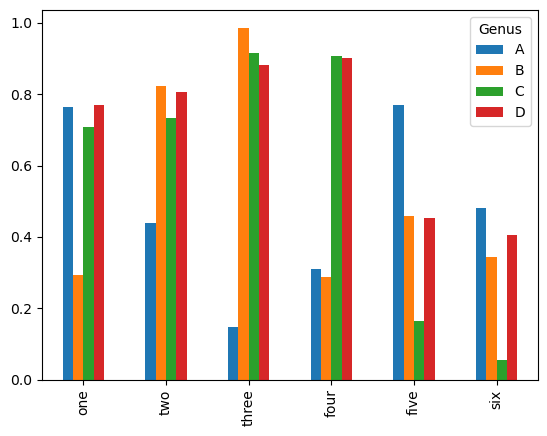

In [23]:
df.plot.bar();

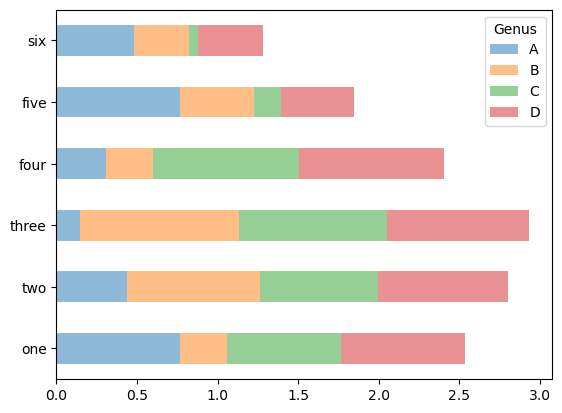

In [24]:
df.plot.barh(stacked=True, alpha=0.5);

In [26]:
tips = pd.read_csv('examples/tips.csv')

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [41]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.reindex(index=['Thur', 'Fri', 'Sat', 'Sun'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [42]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [46]:
party_pcts = party_counts.div(party_counts.sum(axis='columns'),
                              axis='index')
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


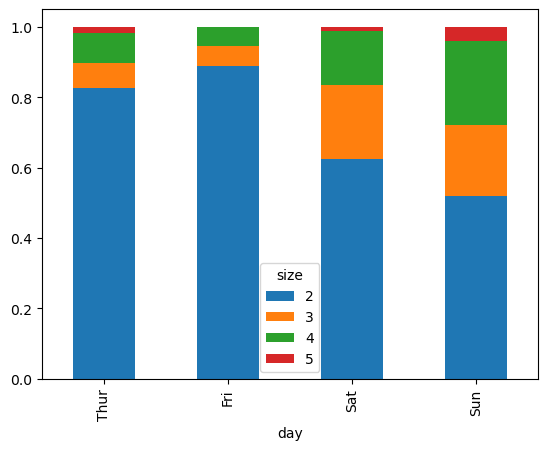

In [48]:
party_pcts.plot.bar(stacked=True);

In [51]:
import seaborn as sns

In [56]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


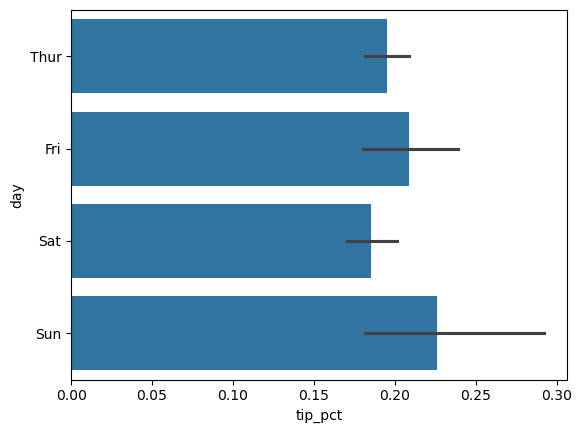

In [67]:
order = ["Thur", "Fri", "Sat", "Sun"]
sns.barplot(data=tips, x='tip_pct', y='day', orient='h', order=order);

In [80]:
sns.set()
sns.set_style('whitegrid')

<Axes: xlabel='tip_pct', ylabel='day'>

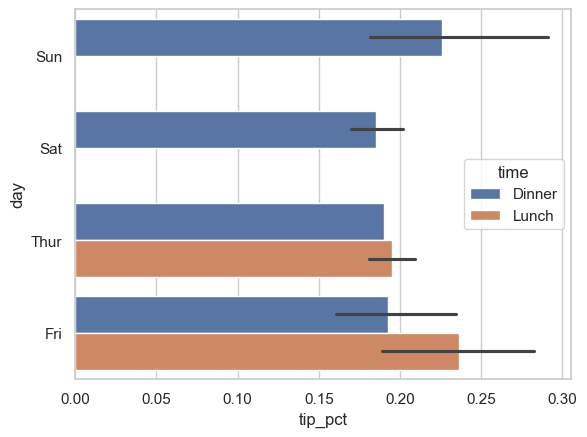

In [81]:
sns.barplot(data=tips, x='tip_pct', y='day', hue='time', orient='h')

ヒストグラムと密度プロット

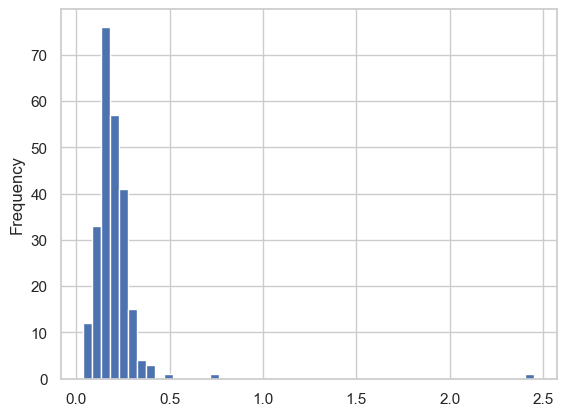

In [83]:
tips['tip_pct'].plot.hist(bins=50);

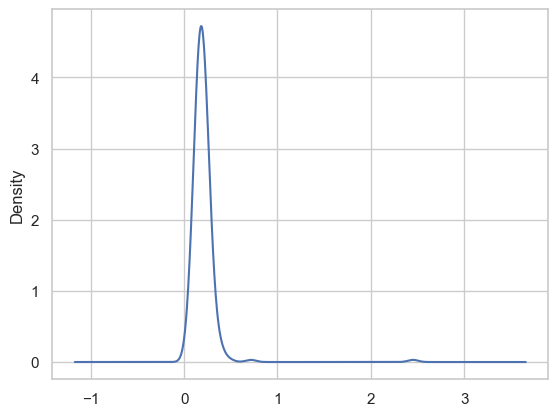

In [85]:
tips['tip_pct'].plot.density();

<Axes: ylabel='Count'>

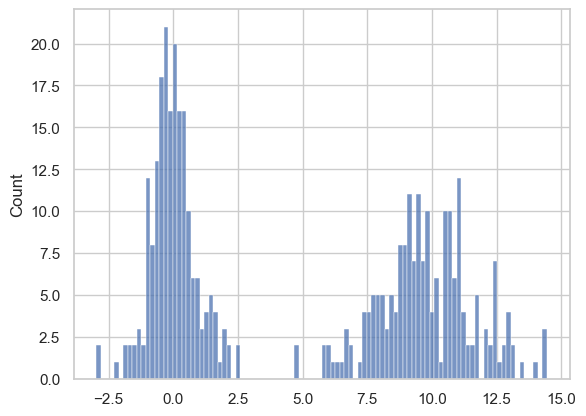

In [86]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100,)

散布図

In [87]:
macro = pd.read_csv('examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [88]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


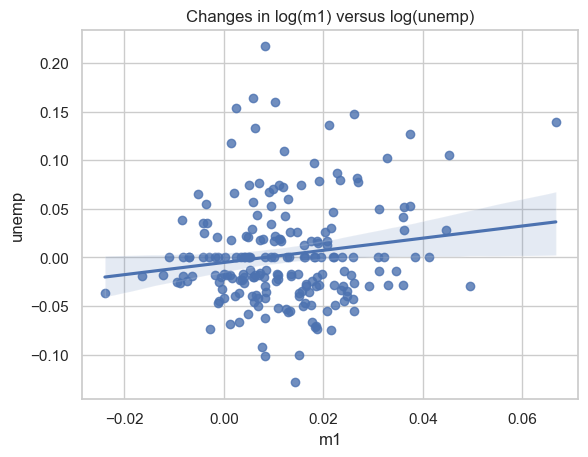

In [95]:
ax = sns.regplot(data=trans_data, x='m1', y='unemp')
ax.set_title("Changes in log(m1) versus log(unemp)");

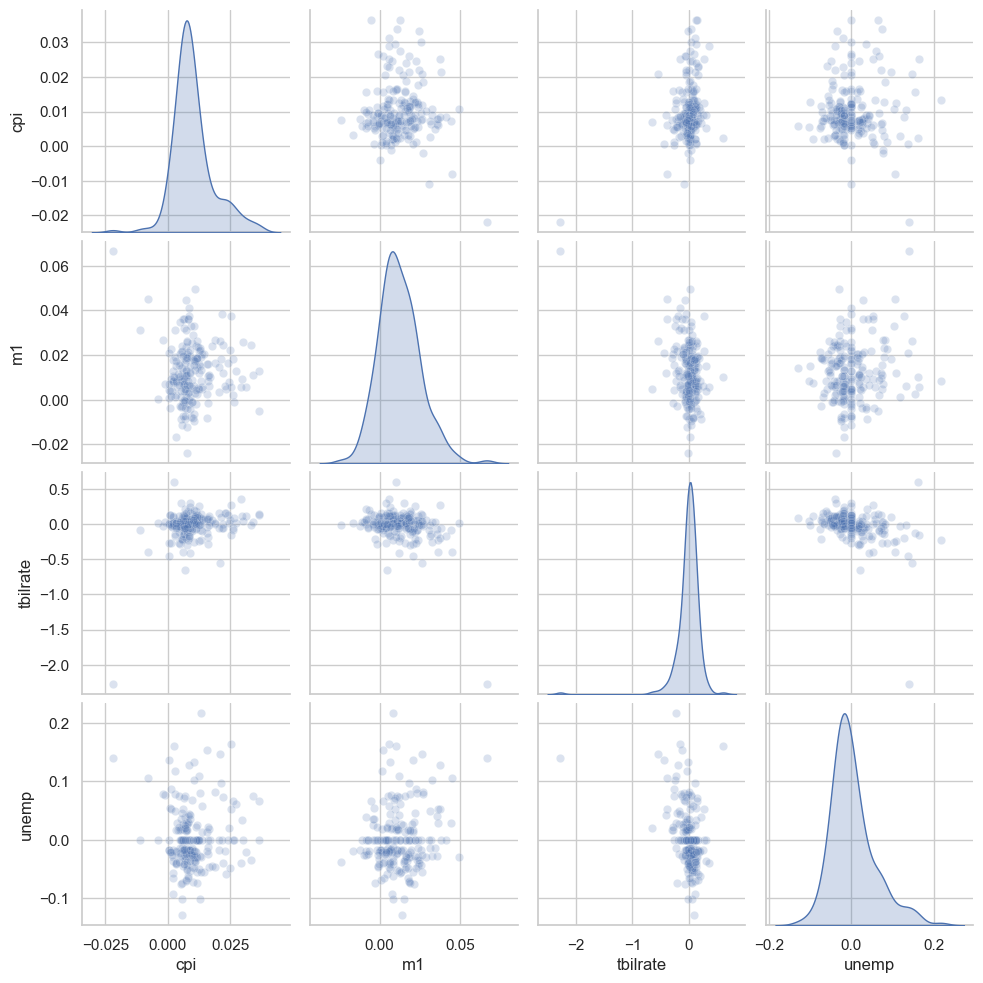

In [96]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

ファセットグリッドとカテゴリ型データ

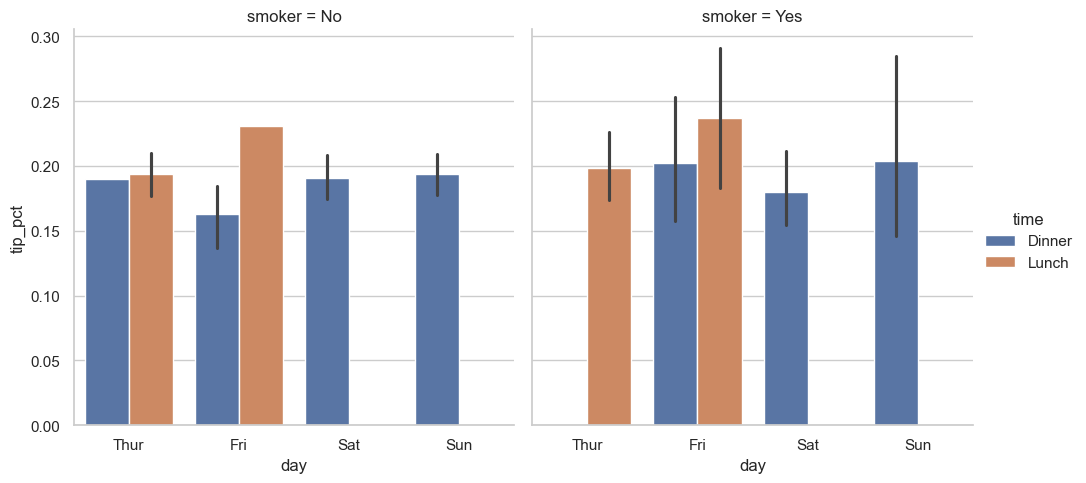

In [99]:
sns.catplot(data=tips[tips.tip_pct<1], x='day', y='tip_pct', hue='time', col='smoker', kind='bar', order=order);

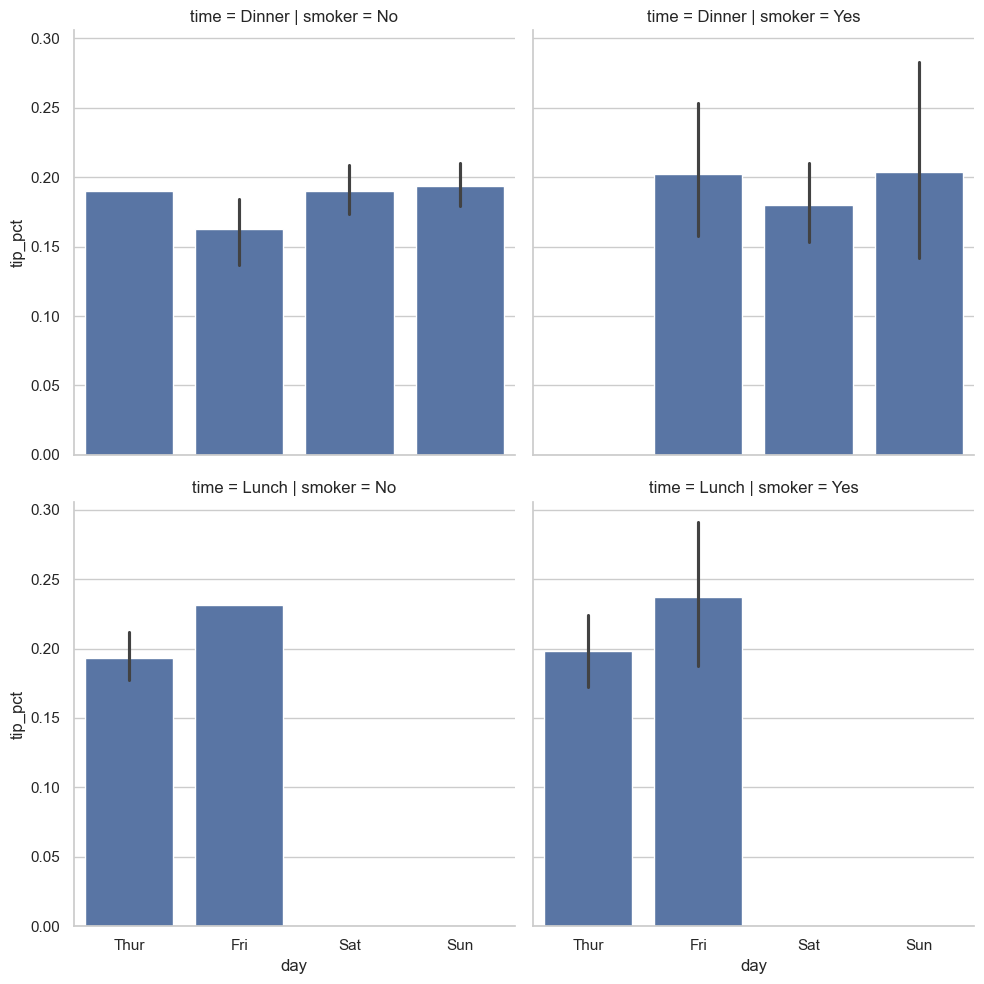

In [101]:
sns.catplot(data=tips[tips.tip_pct<1], x='day', y='tip_pct', row='time', col='smoker', kind='bar', order=order);

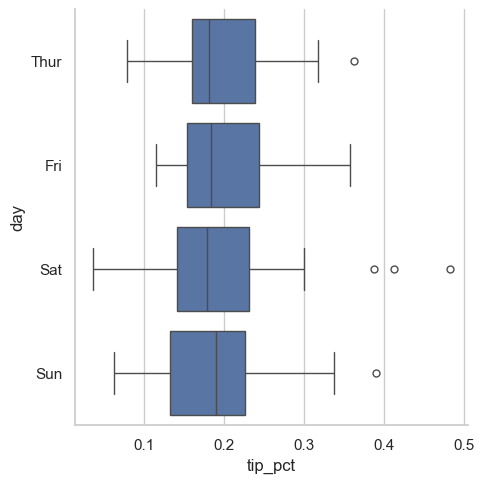

In [102]:
sns.catplot(data= tips[tips.tip_pct<0.5], x= 'tip_pct', y='day', order=order, kind='box');